In [2]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('../data/readytopredict.csv')

In [6]:
df.reset_index(inplace=True)

In [7]:
df

,index,Unnamed: 0,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,0,0,33.000000,22.400000,6.200000,0.36100,0.255000,0.768000,1.200000,2.500000,3.600,1.300,0.900000,0.400000,1.600000,1.600000,0
1,1,1,24.000000,9.700000,2.400000,0.38600,0.571000,0.800000,0.100000,0.800000,0.900,0.700,0.100000,0.000000,0.800000,1.400000,0
2,2,2,29.000000,31.950000,13.300000,0.40650,0.315500,0.745500,1.100000,2.700000,3.850,1.000,0.800000,0.200000,2.200000,2.100000,0
3,3,3,24.750000,22.825000,10.800000,0.42450,0.332250,0.679500,1.600000,3.175000,4.775,0.500,0.425000,0.425000,1.475000,1.725000,0
4,4,4,6.000000,2.300000,0.800000,0.50000,0.500000,0.500000,0.000000,0.200000,0.200,0.200,0.200000,0.000000,0.200000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60855,60855,60855,18.500000,25.250000,13.700000,0.43250,0.153500,0.702000,1.900000,3.500000,5.400,1.350,0.800000,0.250000,2.200000,3.050000,1
60856,60856,60856,35.000000,25.500000,13.525000,0.42600,0.349250,0.687500,2.100000,3.700000,5.775,1.450,0.800000,0.225000,1.375000,2.150000,1
60857,60857,60857,34.500000,30.700000,5.750000,0.40975,0.263000,0.614750,0.675000,4.750000,5.450,5.175,1.525000,0.450000,1.925000,2.275000,1
60858,60858,60858,34.750000,24.575000,10.400000,0.55050,0.348250,0.674000,2.100000,3.250000,5.325,0.800,0.575000,0.475000,1.225000,2.275000,1


In [8]:
def rename_columns(df, new_columns):
    """
    Esta función toma un dataframe y una lista de nuevas etiquetas de columna
    y devuelve el dataframe con las nuevas etiquetas de columna aplicadas.
    """
    df = df.rename(columns=dict(zip(df.columns, new_columns)))
    return df

In [9]:
new_columns = ["0","1","GP", "MPG", "PPG", "FG%", "3P", "FT%", "ORB", "DRB", "RPG", "APG",
               "SPG", "BPG", "TOV", "PF","NBA"]

In [10]:
df = rename_columns(df, new_columns)

In [11]:
df["NBA"].value_counts() / df.shape[0]


0    0.5
1    0.5
Name: NBA, dtype: float64

In [12]:
df.drop(["0","1"],axis=1,inplace=True)

In [13]:
df

,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,33.000000,22.400000,6.200000,0.36100,0.255000,0.768000,1.200000,2.500000,3.600,1.300,0.900000,0.400000,1.600000,1.600000,0
1,24.000000,9.700000,2.400000,0.38600,0.571000,0.800000,0.100000,0.800000,0.900,0.700,0.100000,0.000000,0.800000,1.400000,0
2,29.000000,31.950000,13.300000,0.40650,0.315500,0.745500,1.100000,2.700000,3.850,1.000,0.800000,0.200000,2.200000,2.100000,0
3,24.750000,22.825000,10.800000,0.42450,0.332250,0.679500,1.600000,3.175000,4.775,0.500,0.425000,0.425000,1.475000,1.725000,0
4,6.000000,2.300000,0.800000,0.50000,0.500000,0.500000,0.000000,0.200000,0.200,0.200,0.200000,0.000000,0.200000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60855,18.500000,25.250000,13.700000,0.43250,0.153500,0.702000,1.900000,3.500000,5.400,1.350,0.800000,0.250000,2.200000,3.050000,1
60856,35.000000,25.500000,13.525000,0.42600,0.349250,0.687500,2.100000,3.700000,5.775,1.450,0.800000,0.225000,1.375000,2.150000,1
60857,34.500000,30.700000,5.750000,0.40975,0.263000,0.614750,0.675000,4.750000,5.450,5.175,1.525000,0.450000,1.925000,2.275000,1
60858,34.750000,24.575000,10.400000,0.55050,0.348250,0.674000,2.100000,3.250000,5.325,0.800,0.575000,0.475000,1.225000,2.275000,1


In [14]:
df_numericas = df.select_dtypes(include = np.number).drop("NBA", axis = 1)
df_numericas.head()

,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,33.00,22.400,6.2,0.3610,0.25500,0.7680,1.2,2.500,3.600,1.3,0.900,0.400,1.600,1.600
1,24.00,9.700,2.4,0.3860,0.57100,0.8000,0.1,0.800,0.900,0.7,0.100,0.000,0.800,1.400
2,29.00,31.950,13.3,0.4065,0.31550,0.7455,1.1,2.700,3.850,1.0,0.800,0.200,2.200,2.100
3,24.75,22.825,10.8,0.4245,0.33225,0.6795,1.6,3.175,4.775,0.5,0.425,0.425,1.475,1.725
4,6.00,2.300,0.8,0.5000,0.50000,0.5000,0.0,0.200,0.200,0.2,0.200,0.000,0.200,0.500


In [15]:
correlation = df_numericas.corr()
correlation

,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
GP,1.000000,0.782718,0.678968,0.485965,0.370068,0.661823,0.479729,0.632543,0.606078,0.489257,0.571332,0.333727,0.616170,0.698926
MPG,0.782718,1.000000,0.909331,0.392542,0.459792,0.652061,0.511140,0.768482,0.710977,0.702155,0.777118,0.313391,0.857956,0.756178
PPG,0.678968,0.909331,1.000000,0.394349,0.436665,0.591560,0.541336,0.771454,0.723903,0.596993,0.707659,0.334930,0.822876,0.671522
FG%,0.485965,0.392542,0.394349,1.000000,0.166556,0.335875,0.505571,0.475397,0.507800,0.111605,0.226649,0.419631,0.311201,0.497889
3P,0.370068,0.459792,0.436665,0.166556,1.000000,0.440729,-0.037814,0.214640,0.133478,0.411399,0.407274,-0.109522,0.357194,0.202491
FT%,0.661823,0.652061,0.591560,0.335875,0.440729,1.000000,0.241071,0.435437,0.385196,0.444711,0.482263,0.120439,0.528529,0.524445
ORB,0.479729,0.511140,0.541336,0.505571,-0.037814,0.241071,1.000000,0.812114,0.916353,0.018105,0.283626,0.684987,0.432591,0.669055
DRB,0.632543,0.768482,0.771454,0.475397,0.214640,0.435437,0.812114,1.000000,0.977663,0.345033,0.514893,0.628061,0.676857,0.744219
RPG,0.606078,0.710977,0.723903,0.507800,0.133478,0.385196,0.916353,0.977663,1.000000,0.243296,0.455092,0.677038,0.619807,0.750790
APG,0.489257,0.702155,0.596993,0.111605,0.411399,0.444711,0.018105,0.345033,0.243296,1.000000,0.770530,-0.085255,0.747494,0.371191


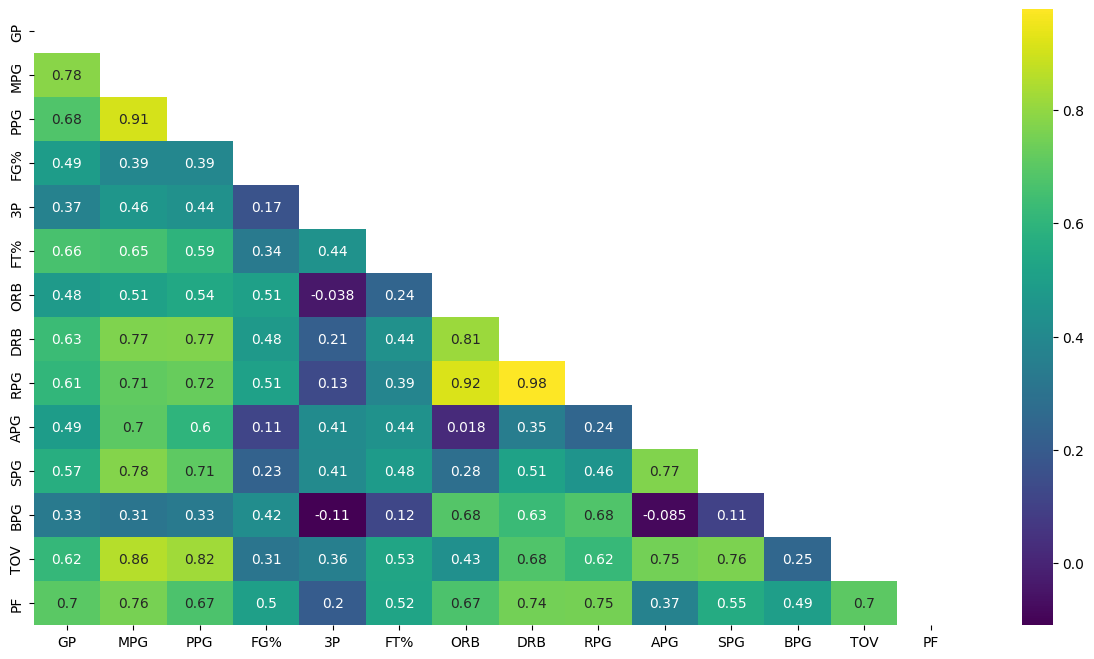

In [16]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); 

# ·Ajuste del modelo

In [17]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop("NBA", axis = 1) # variables predictoras
y = df["NBA"] # variable respuesta 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [19]:
y_train.describe()

count    48688.000000
mean         0.501684
std          0.500002
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: NBA, dtype: float64

In [20]:
y_test.describe()

count    12172.000000
mean         0.493263
std          0.499975
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: NBA, dtype: float64

In [21]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [22]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [23]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

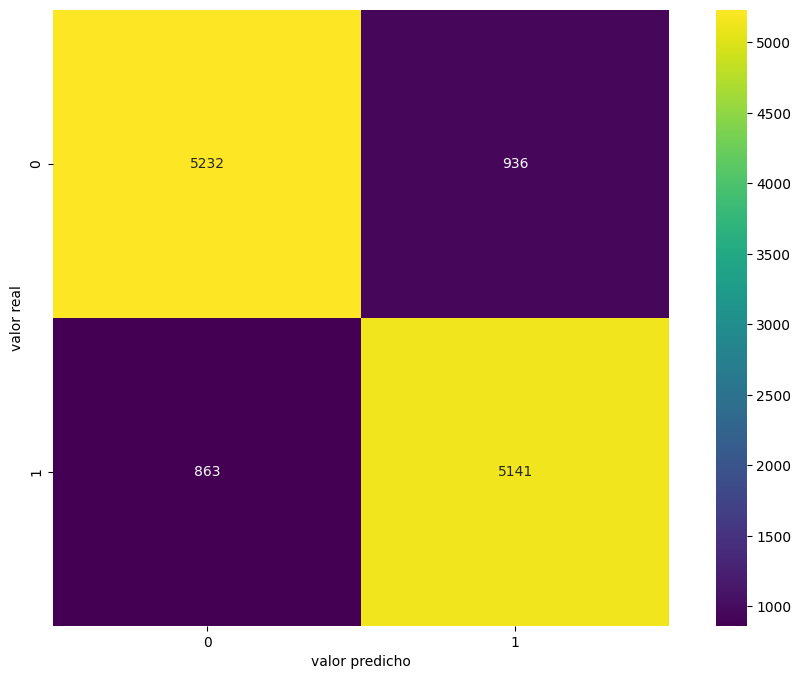

In [24]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [25]:
# vamos a hacernos una función
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [26]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852202,0.845977,0.856262,0.851088,0.704398,test,Regresión logistica
1,0.849737,0.846609,0.855482,0.851022,0.699460,train,Regresión logistica


# Decision tree

In [27]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.7416573867739413

In [29]:

y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [30]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.986116,0.972623,1.0,0.986121,0.972237,test,Decission Tree I
1,1.000000,1.000000,1.0,1.000000,1.000000,train,Decission Tree I


In [31]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

45


In [32]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [46],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [33]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
CPU times: total: 2.03 s
Wall time: 8.32 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [46], 'max_features': [4],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [34]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
arbol2.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 46,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [35]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol3 = DecisionTreeClassifier( max_depth =  46, max_features=4, min_samples_split=50)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=46, max_features=4, min_samples_split=50)

In [36]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

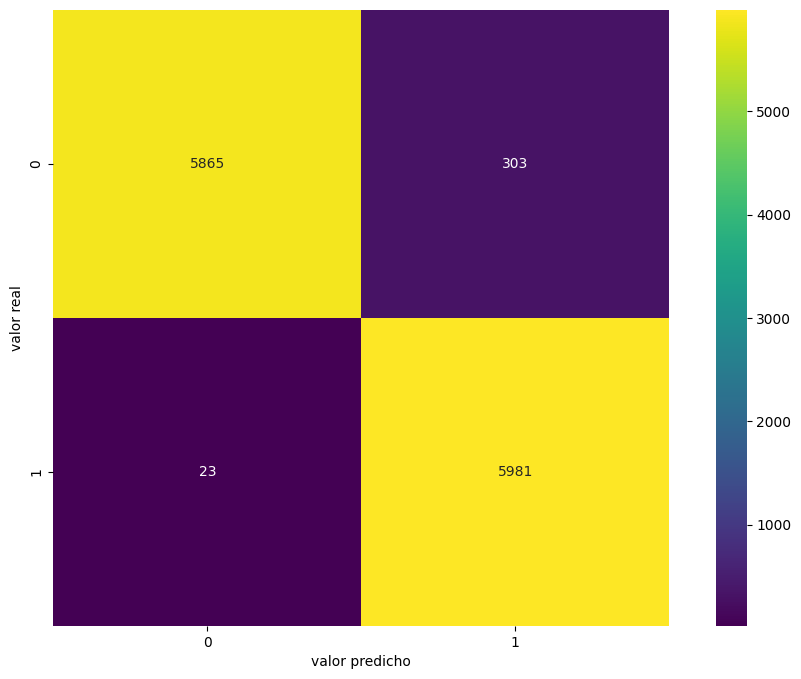

In [37]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [38]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.973217,0.951782,0.996169,0.973470,0.946458,test,Decission Tree II
1,0.986054,0.976522,0.996152,0.986239,0.972106,train,Decission Tree II


In [40]:
import pickle
#GUARDAMOS EL MODELO.
nombre_archivo = 'Dtree.pkl'
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(arbol3, archivo)

In [39]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852202,0.845977,0.856262,0.851088,0.704398,test,Regresión logistica
1,0.849737,0.846609,0.855482,0.851022,0.699460,train,Regresión logistica
0,0.973217,0.951782,0.996169,0.973470,0.946458,test,Decission Tree II
1,0.986054,0.976522,0.996152,0.986239,0.972106,train,Decission Tree II


# ·RANDOM FOREST

In [51]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3, 4,6,8,10],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}


# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [52]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
CPU times: total: 1min 13s
Wall time: 47min 24s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [53]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")

random_forest.best_params_


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [54]:
clf=RandomForestClassifier(min_samples_split= 100,
                           max_features=4,
                           max_depth=10)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=100)

In [55]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

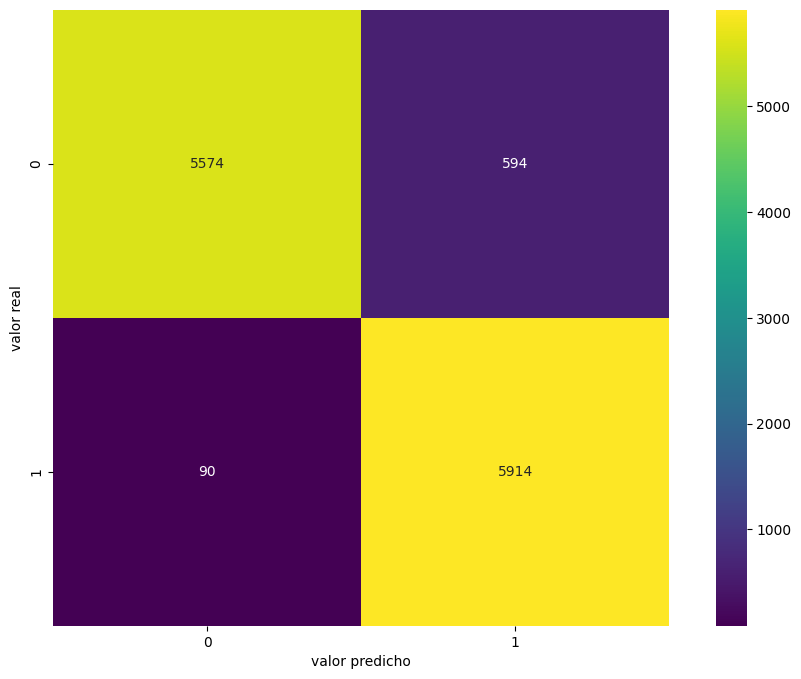

In [56]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [57]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852202,0.845977,0.856262,0.851088,0.704398,test,Regresión logistica
1,0.849737,0.846609,0.855482,0.851022,0.699460,train,Regresión logistica
0,0.972231,0.951834,0.994004,0.972462,0.944485,test,Decission Tree II
1,0.986732,0.978432,0.995497,0.986891,0.973462,train,Decission Tree II
0,0.943805,0.908728,0.985010,0.945332,0.887716,test,Random Forest
1,0.947071,0.917428,0.982969,0.949068,0.894116,train,Random Forest


# ·KNN 

In [58]:
# qué métricas podemos usar en el cross_val_score
# ==============================================================================
from sklearn import metrics

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [59]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score=cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "accuracy")
    knn_scores.append(score.mean())

In [60]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
0,1,0.986379
1,2,0.986379
2,3,0.976257


In [61]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

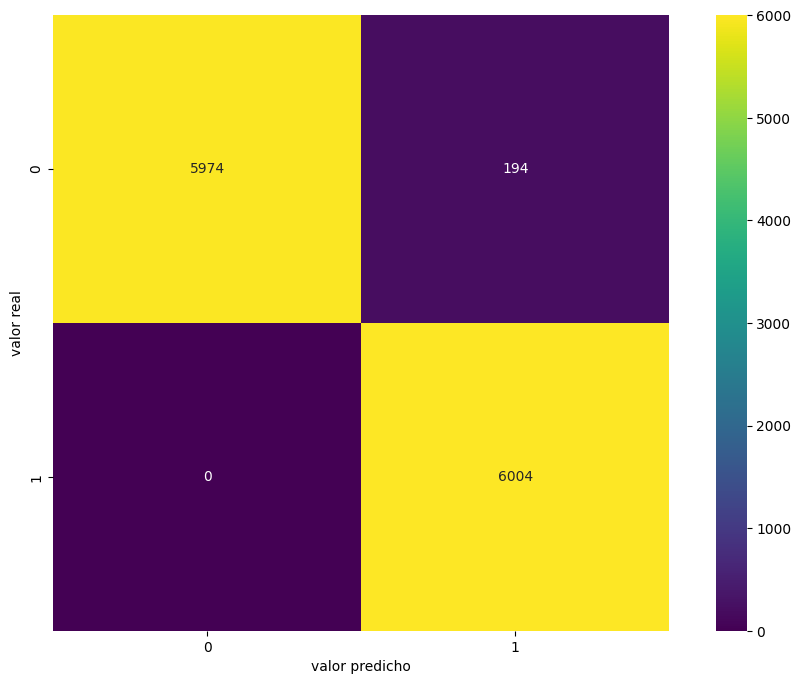

In [63]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

In [64]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN2")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852202,0.845977,0.856262,0.851088,0.704398,test,Regresión logistica
1,0.849737,0.846609,0.855482,0.851022,0.699460,train,Regresión logistica
0,0.972231,0.951834,0.994004,0.972462,0.944485,test,Decission Tree II
1,0.986732,0.978432,0.995497,0.986891,0.973462,train,Decission Tree II
0,0.943805,0.908728,0.985010,0.945332,0.887716,test,Random Forest
1,0.947071,0.917428,0.982969,0.949068,0.894116,train,Random Forest
0,0.984062,0.968700,1.000000,0.984101,0.968131,test,KNN2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,KNN2


In [3]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3, 4,6,8,10],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

NameError: name 'X_train' is not defined